# Usage Guide : pygtm
## search elements

In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
sys.path.insert(0, '../')
from pygtm.physical import physical_space

# Parameters
- T: Transition time [day]
- spatial_dis : number of bin in the the meridional direction (the number in the zonal direction is fixed to have almost square bin)
- lon : min and max longitude value of the initial domain
- lat : min and max latitude value of the initial domain

In [3]:
T = 5  # transition time [days]
spatial_dis = 75
lon = [-98, 35]
lat = [-10, 80]

# create the grid and bins
d = physical_space(lon, lat, spatial_dis)

# Searching the element number of a specific location

In [4]:
p = [-60, 20] # lon, lat
el_id = d.find_element(p[0], p[1])
print(el_id)

[1205]


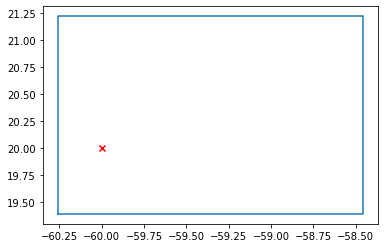

In [5]:
# plot the element and the search location
b1 = d.bins[el_id[0]]

# reorder (0, 1, 3, 2, 0) for a close loop
b1 = b1[np.array([0,1,3,2,0])]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(p[0], p[1], marker='x', color='r')
ax.plot(d.coords[b1,0], d.coords[b1,1])

# The function is also vectorize so it's possible to search multiple points

In [6]:
x_p = np.array([-70, -60, -40, 0, 10, 30])
y_p = np.array([70, 20, 30, 0, 74, 30])
els_id = d.find_element(x_p, y_p)
print(repr(els_id))

array([3197, 1205, 1586,  424, 3390, 1625])


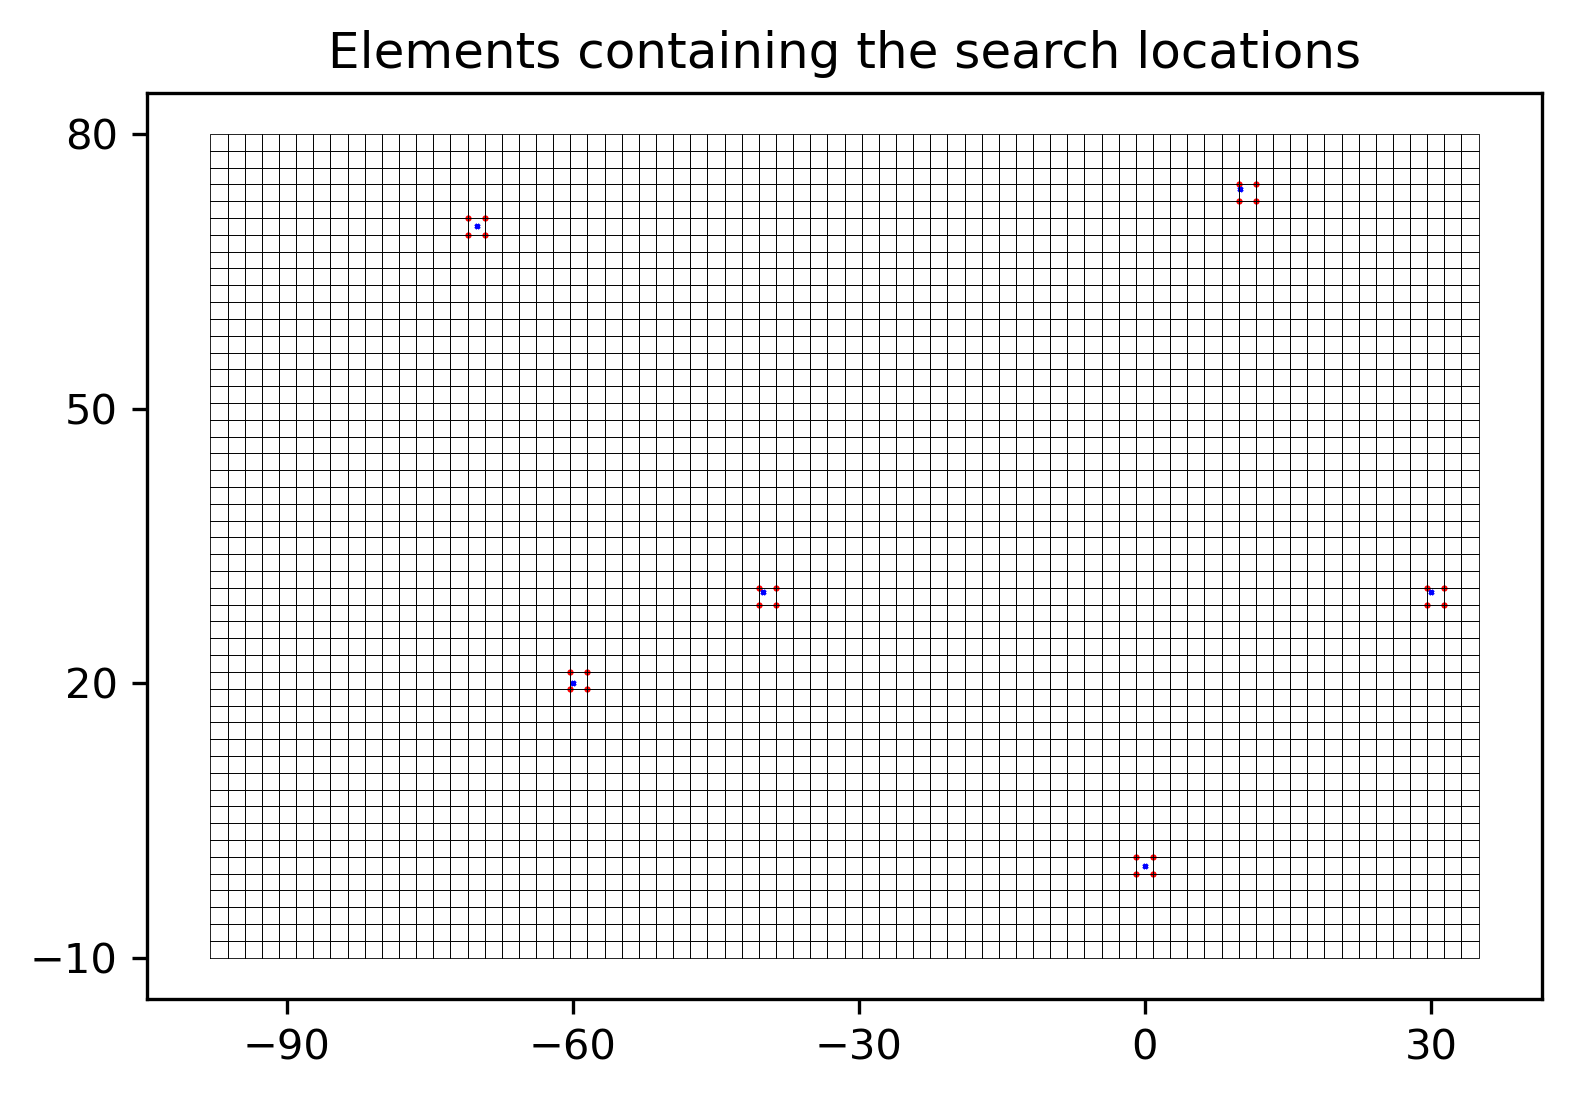

In [7]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)

# scatter at the corner of the element containing the point
for i, el_id in enumerate(els_id):
    el_c = d.coords[d.bins[el_id,:],:]
    ax.scatter(el_c[:,0], el_c[:,1], s=0.25, marker='o',color='r')
    ax.scatter(x_p[i], y_p[i], s=0.25, marker='x', color='b')

d.bins_contour(ax)

ax.set_xticks([-90, -60, -30, 0, 30])
ax.set_yticks([-10, 20, 50, 80])
ax.set_title('Elements containing the search locations');